# Detección de Idiomas - Naive Bayes

### Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Cargar el dataset

In [2]:
df = pd.read_csv("dataset/updated_language_detection.csv")
df.describe()

,Text,Language
count,20821,20821
unique,20821,21
top,aprilie sonda spațială messenger a nasa și-a ...,Thai
freq,1,1000


### Dividir el dataset en conjuntos de entrenamiento y prueba

Se utiliza stratify para mantener la proporción de clases en los conjuntos de entrenamiento y prueba.

In [3]:
X = df['Text']
y = df['Language']

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42, stratify=df['Language'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16656,), (4165,), (16656,), (4165,))

### Convertir texto a Bag of Words

In [4]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

### Entrenar el modelo

In [5]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

MultinomialNB()

### Evaluar el modelo

In [6]:
y_pred = nb_model.predict(X_test_bow)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9779111644657863

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       199
       Dutch       0.98      0.98      0.98       199
     English       0.75      1.00      0.86       200
    Estonian       0.98      0.98      0.98       200
      French       0.96      1.00      0.98       198
       Hindi       1.00      1.00      1.00       197
  Indonesian       0.99      0.98      0.99       194
    Japanese       1.00      0.63      0.77       200
      Korean       1.00      1.00      1.00       200
       Latin       0.98      0.97      0.98       190
     Persian       1.00      1.00      1.00       200
   Portugese       0.99      1.00      1.00       199
      Pushto       1.00      1.00      1.00       197
    Romanian       0.99      0.99      0.99       200
     Russian       0.99      0.99      0.99       200
     Spanish       0.99      0.99      0.99       199
     Swedish       0.99    

#### Reporte de Clasificación

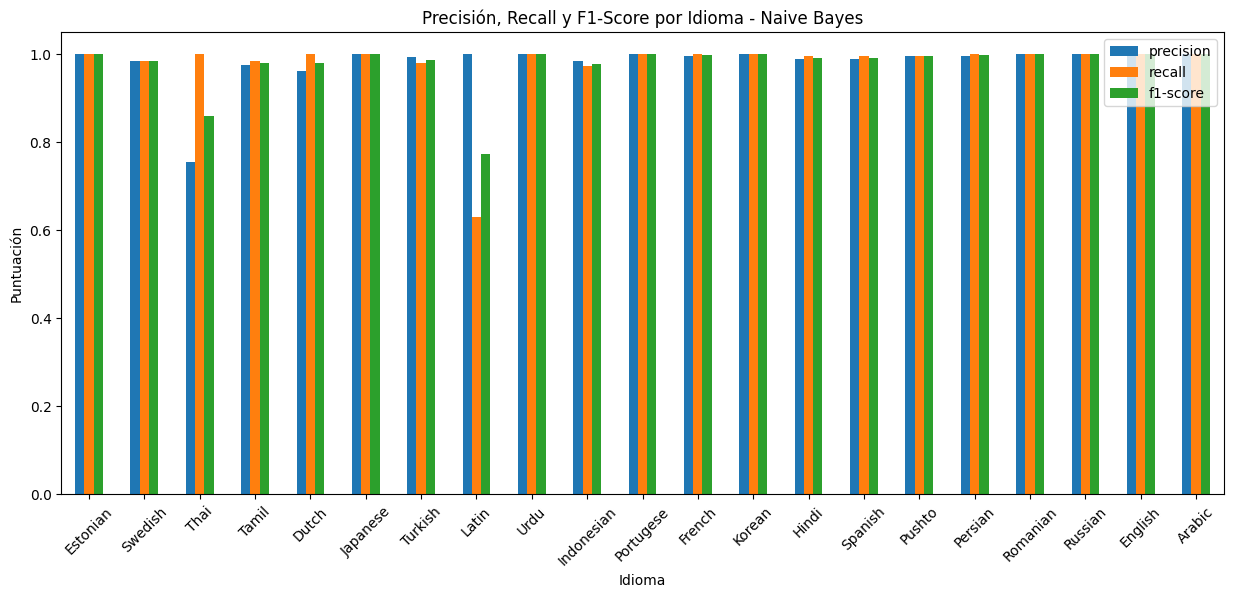

In [7]:
language_names = df['Language'].unique()
report_dict = classification_report(y_test, y_pred, target_names=language_names, output_dict=True)
report_df = pd.DataFrame(report_dict).T[:-3]

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 6))
plt.title("Precisión, Recall y F1-Score por Idioma - Naive Bayes")
plt.ylabel("Puntuación")
plt.xlabel("Idioma")
plt.xticks(rotation=45)
plt.savefig("plots/nb_precision_recall_f1.png")
plt.show()

In [8]:
for i in range(15,20):
    print("Text: ", X_test.iloc[i])
    print("Actual Language: ", y_test.iloc[i])
    print("Predicted Language: ", y_pred[i], "\n")

Text:  سنقی القرآن سورہ آیت۔۔۔* اے میرے رب، انہوں نے بہت سے لوگوں کو گمراہ کیا ہے، پس جو میری پیروی کرے گا وہ مجھ میں سے ہے، اور جو میری نافرمانی کرے گا، بیشک تو بخشنے والا اور رحم کرنے والا ہے۔
Actual Language:  Urdu
Predicted Language:  Urdu 

Text:   yılının haziran ayında özbekler ve kırgızlar arasındaki etnik gerginlikler özbeklerin olduğu oş i̇lini kaplamıştı şiddetli karşılaşmalar birbirini izledi ve bir emniyet ve sokağa çıkma yasağı durumu hasıl oldu  yılının ağustos ayına kadar düzen eski haline getirilemedi
Actual Language:  Turkish
Predicted Language:  Turkish 

Text:  "its a long way to tipperary" longa est via ad tipperariam est cantus anglicus ab iacobo judge compositus anno  ut videtur narrator carminis hibernus quidam londinii habitans de desiderio amiculae tipperariae relictae canit cantus clarissimus factus est tempore belli mundani primi cum milites britannici in francia eum cantaverunt
Actual Language:  Latin
Predicted Language:  Latin 

Text:  авто́бусный переу́ло

#### Matriz de Confusión

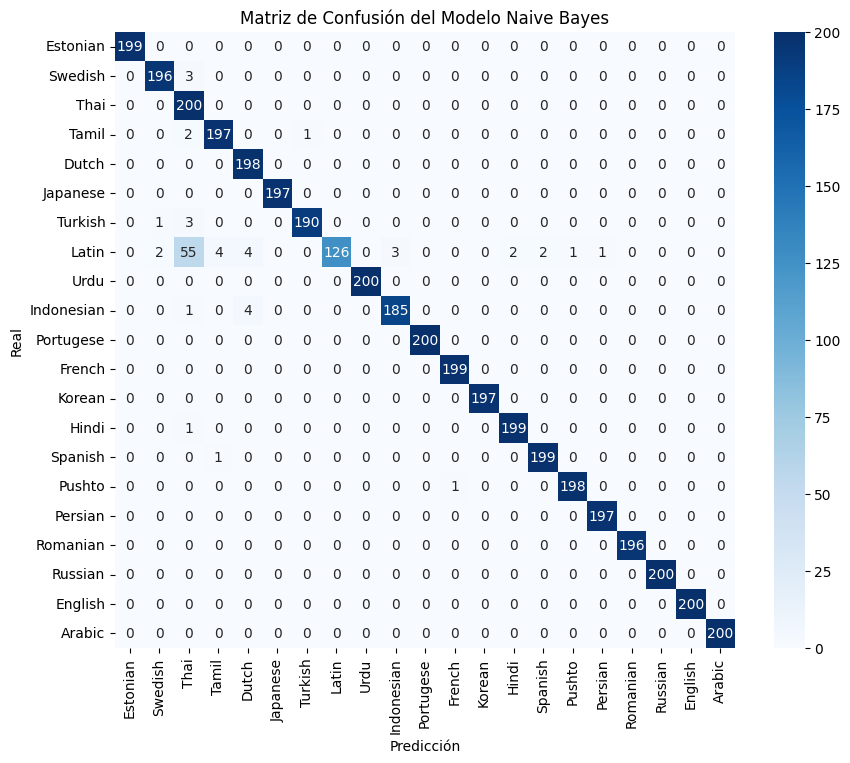

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.title("Matriz de Confusión del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("plots/nb_confusion_matrix.png")
plt.show()

### Matriz de Confusión Normalizada

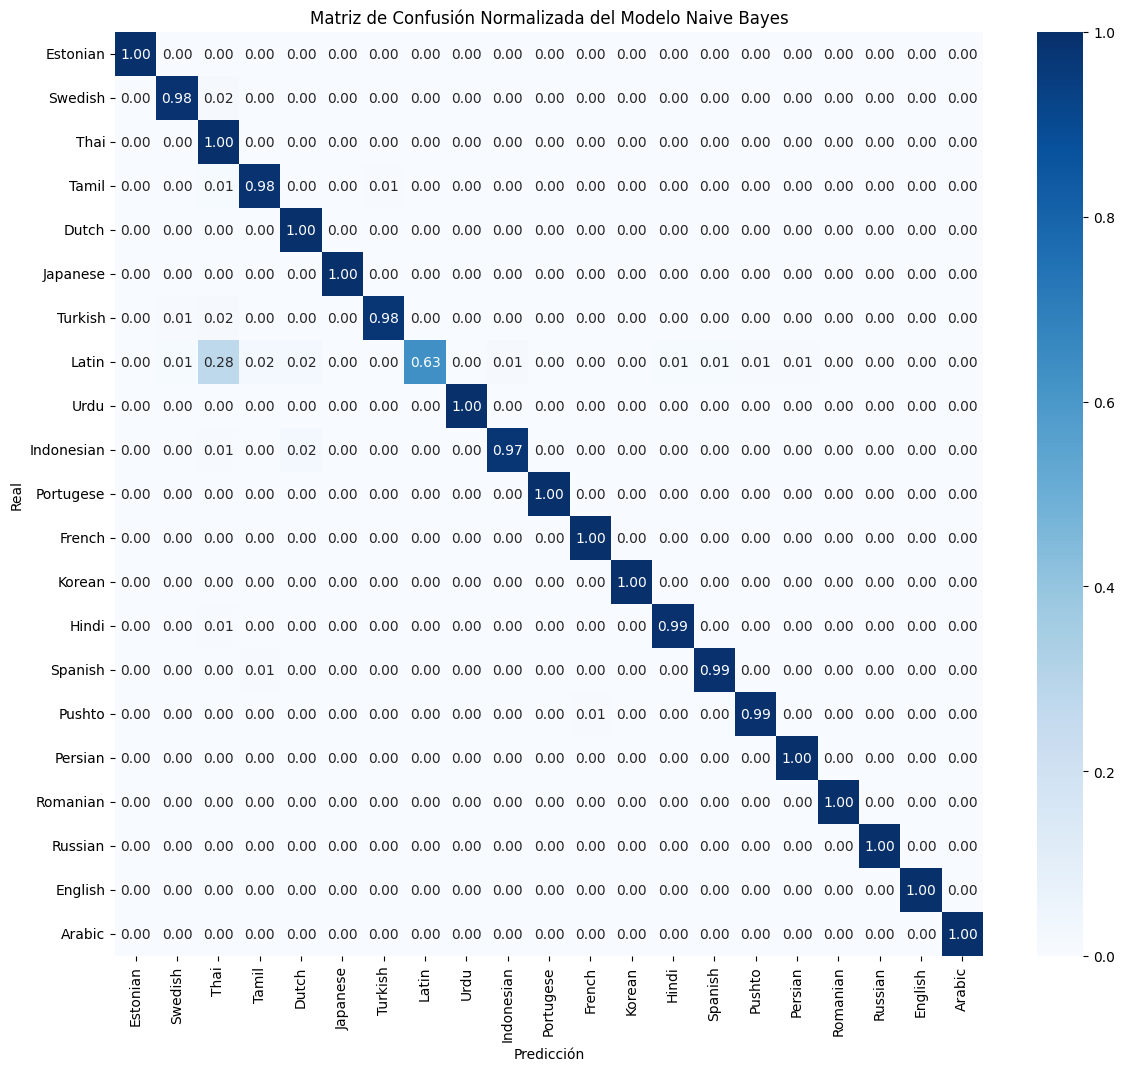

In [10]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.title("Matriz de Confusión Normalizada del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("plots/nb_confusion_matrix_normalized.png")
plt.show()